In [200]:
# Import necessary libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
warnings.filterwarnings('ignore')

In [176]:
# load data
df = pd.read_csv(r"B:\ML projects\House price project\House price prediction.csv")
df.shape
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [178]:
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [179]:
# Dropping duplicates
df.drop_duplicates(inplace=True)
df.shape

(4600, 18)

In [180]:
# Dropping unwanted columns
df.drop(columns=['date', 'street', 'city', 'statezip', 'country'], inplace=True)
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0


In [181]:
# Null values
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

<Axes: ylabel='price'>

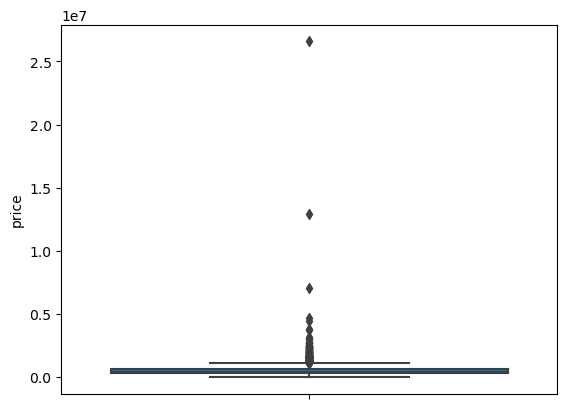

In [182]:
# Use boxplot to check for outliers
sns.boxplot(df,y='price')

In [183]:
# You can use interquartile range method to sort outliers among other methods. 

#Here I am handling the outliers in the price column

# 25th percentile
Q1 = np.percentile(df['price'],25,interpolation='midpoint')
# 75th percentile
Q3 = np.percentile(df['price'],75,interpolation='midpoint')

Q1
Q3

654975.0

In [184]:
# Interquartile range
IQR = Q3 - Q1

# Developing the bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5* IQR

df = df[(df.price < upper ) & (df.price > lower)]
df.shape

(4360, 13)

In [185]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [186]:
# Drop the target variable 'price' from X-features.
X = df.drop(columns = 'price')
y = df['price']

In [187]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
5,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [188]:
# Data standardization or Data normalization process
# Use the minmaxscaler function to fit and transform the scale in feature-values. 
# Another option would be the standardscaler function.
scaler = MinMaxScaler()
scaler.fit(X)

# We use [:] - so that our data is not stored in an array format but a dataframe
X[:] = scaler.transform(X)

In [189]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,0.333333,0.24,0.126797,0.006775,0.2,0,0.0,0.50,0.126797,0.000000,0.482456,0.995531
2,0.333333,0.32,0.203922,0.010534,0.0,0,0.0,0.75,0.203922,0.000000,0.578947,0.000000
3,0.333333,0.36,0.213072,0.006885,0.0,0,0.0,0.75,0.082353,0.434783,0.552632,0.000000
4,0.444444,0.40,0.205229,0.009186,0.0,0,0.0,0.75,0.100654,0.347826,0.666667,0.989076
5,0.222222,0.16,0.066667,0.005348,0.0,0,0.0,0.50,0.066667,0.000000,0.333333,0.990070
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.333333,0.28,0.149020,0.005330,0.0,0,0.0,0.75,0.149020,0.000000,0.473684,0.982622
4596,0.333333,0.40,0.142484,0.006460,0.4,0,0.0,0.50,0.142484,0.000000,0.728070,0.997517
4597,0.333333,0.40,0.345098,0.005939,0.4,0,0.0,0.50,0.345098,0.000000,0.956140,0.000000
4598,0.444444,0.32,0.224837,0.005581,0.0,0,0.0,0.50,0.091503,0.443478,0.649123,0.000000


In [190]:
# Split the dataset for train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=18)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3052, 12), (1308, 12), (3052,), (1308,))

In [191]:
# Linear regression modelling
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [192]:
y_pred = model.predict(X_test)
y_pred[:5]

array([377974.78671734, 451494.89432493, 831363.67708124, 252984.81467983,
       447328.89935571])

In [193]:
y_test[:5]

1125    260000.0
706     592500.0
1925    765000.0
2687    250000.0
1159    361000.0
Name: price, dtype: float64

In [194]:
# Evaluating the model
mean_absolute_error(y_test,y_pred)

131309.88919190387

In [195]:
# We can use regularization and optimization techniques tailored to linear regression.
# The reason is to make the MAE lower than what the base regression model has come up with.

In [196]:
# 1st regularization technique to try is Lasso regression or L1
lasso = Lasso(alpha =10, max_iter= 100, tol=0.05)
lasso.fit(X_train,y_train)

Lasso(alpha=10, max_iter=100, tol=0.05)

In [197]:
lasso_pred = lasso.predict(X_test)
mean_absolute_error(y_test,lasso_pred)

131327.52337010799

In [209]:
# LassoCV with cross-validation
lasso_cv = LassoCV(
    alphas=[0.1, 1, 10],  # Alpha values
    cv=3,  # 5-fold cross-validation
    max_iter=100,
    tol=0.01,
    random_state=74
)

# Fit model
lasso_cv.fit(X_train, y_train)

# Best alpha found
print("Best alpha:", lasso_cv.alpha_)

# Evaluate
lasso_cv_pred = lasso_cv.predict(X_test)
mean_absolute_error(y_test, lasso_cv_pred)

Best alpha: 10.0


131365.1095675907

In [198]:
# 2nd regularization technique to try is Ridge regression or L2
ridge = Ridge(alpha = 50, max_iter= 100, tol=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [199]:
ridge_pred = ridge.predict(X_test)
mean_absolute_error(y_test,ridge_pred)

142933.1815245545